In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Visualisation of Prediction - Artifical Signal

In [2]:
artifical_data = pd.read_csv("../../files/prediction/MLE/artifical_2_signals.csv", sep=";")
subset = artifical_data.iloc[10000:,:]

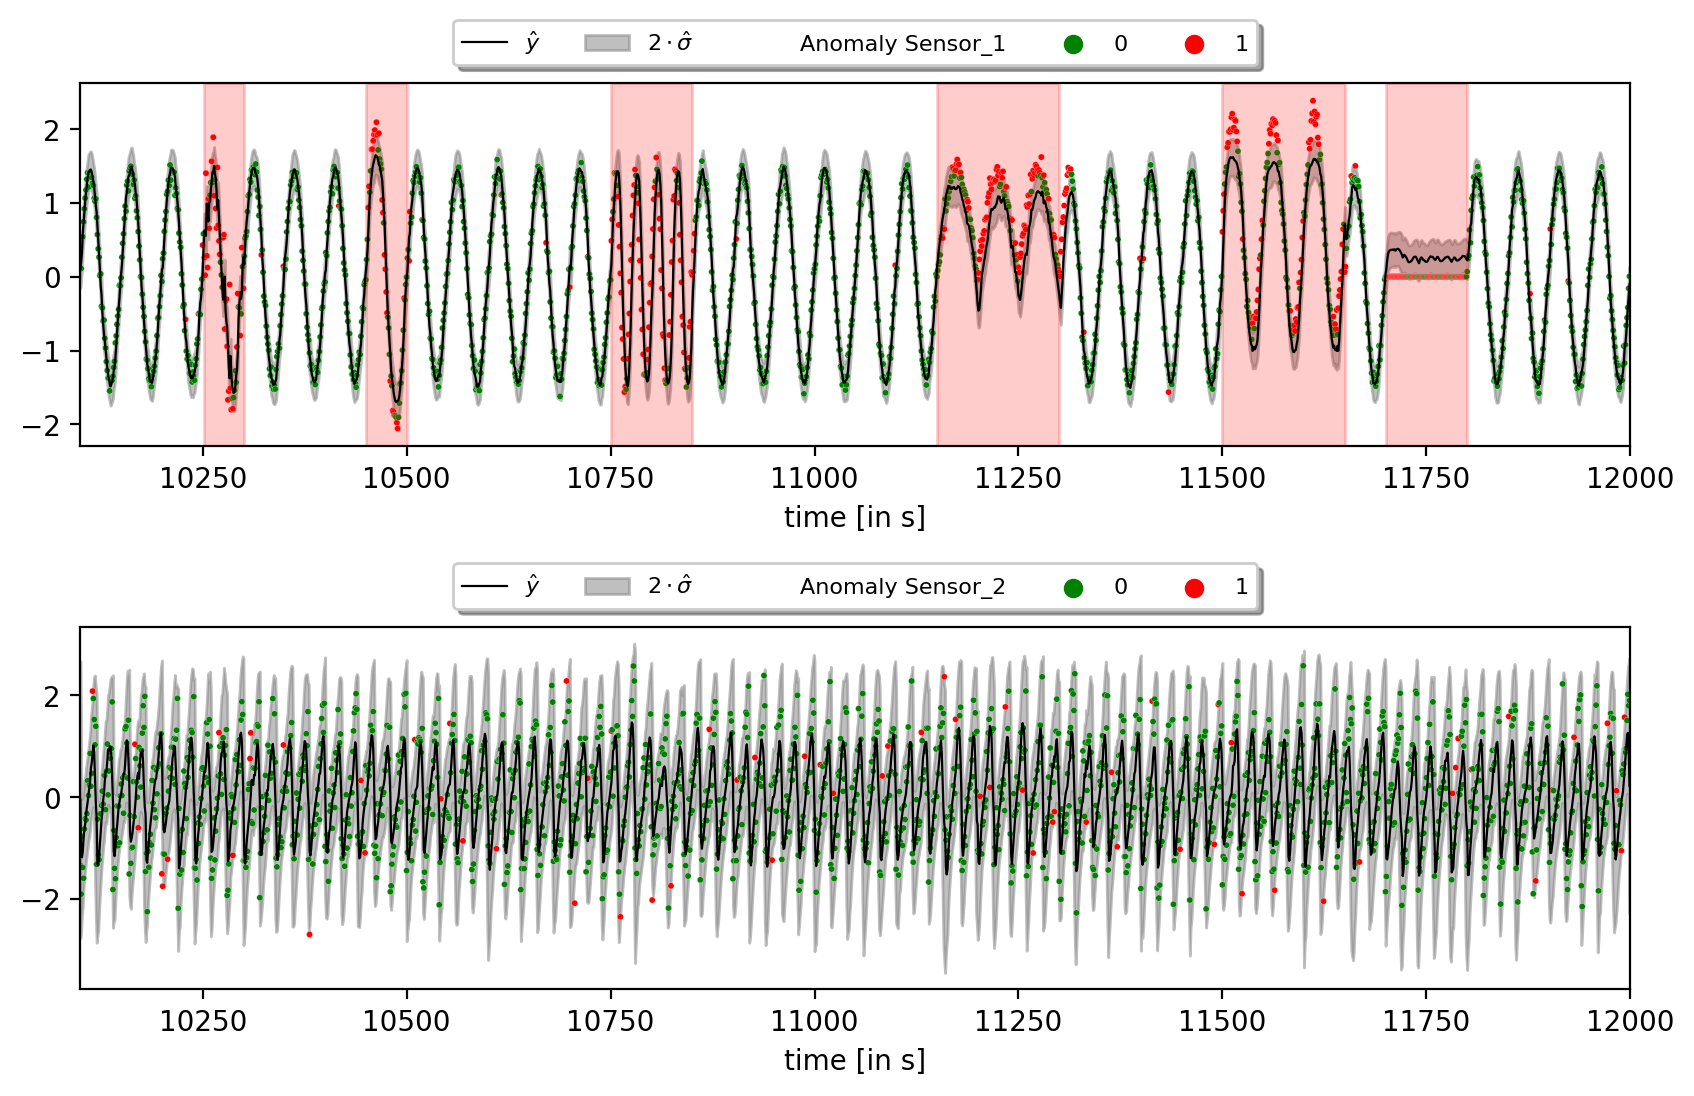

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):
    #t = range(10000,artifical_data.shape[0]+10000)
    
    # Create Sigma Band
    target = subset.iloc[:,i].values
    mu = subset.iloc[:,i+2].values
    sigma = subset.iloc[:,i+4].values
    lower_bound = mu - 2*sigma
    upper_bound = mu + 2* sigma
    
    # Predicted mu
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i+2], 
                 ax=ax[i-1], 
                 color="black",
                 label="$\hat{y}$",
                 linewidth=.8)
    
    # Plot prediction interval
    ax[i-1].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5, label="$2 \cdot \hat{\sigma}$")
    
    # Target sensor values (actual sensor values)
    sns.scatterplot(data=subset, 
                    x=t, 
                    y=columns[i],
                    ax=ax[i-1], 
                    hue=columns[i+9], 
                    palette=["green", "red"],
                    s=5,
                    linewidth=.1)
    
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')
    
    # Set legend etc.
    ax[i-1].legend(loc='lower center', 
                   bbox_to_anchor=(0.5, 1.02),
                   fancybox=True, 
                   shadow=True, 
                   ncol=5,
                   prop={'size': 8})
    ax[i-1].set_xlabel("time [in s]")
    ax[i-1].set_ylabel("")
    ax[i-1].set_xlim(10100, 12000)
    
plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/classific_artfic.png")
plt.show()